<a href="https://colab.research.google.com/github/Roumyajit/My-Project-Data-Science/blob/main/Copy_of_Superstore_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003033  Technology 

<ipython-input-1-af2596d26d41>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='crest')


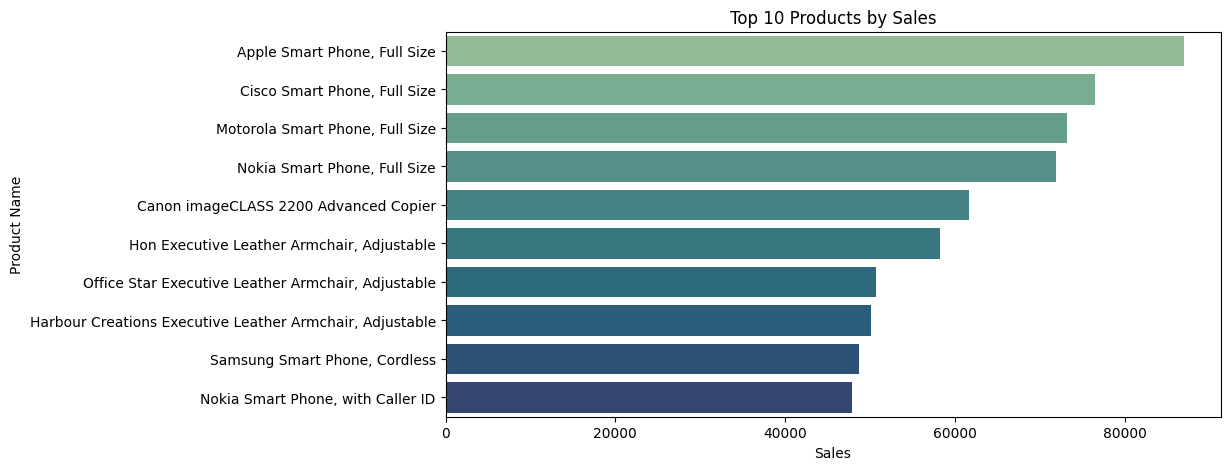

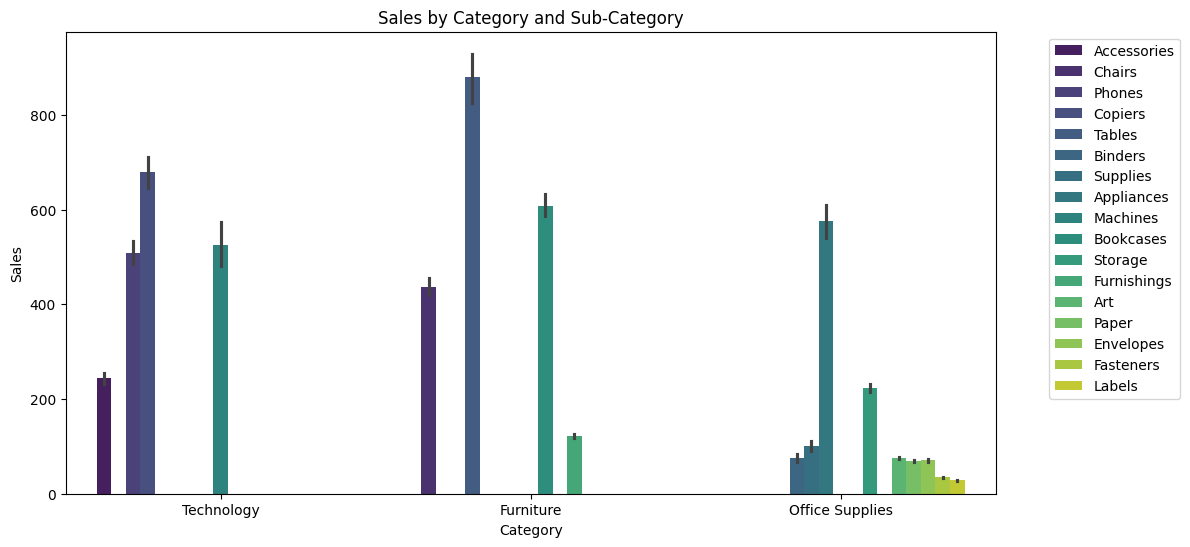

<ipython-input-1-af2596d26d41>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='magma')


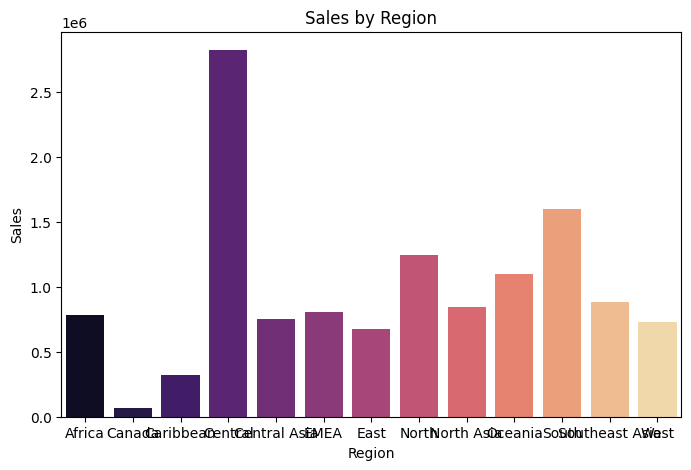

<ipython-input-1-af2596d26d41>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='flare')


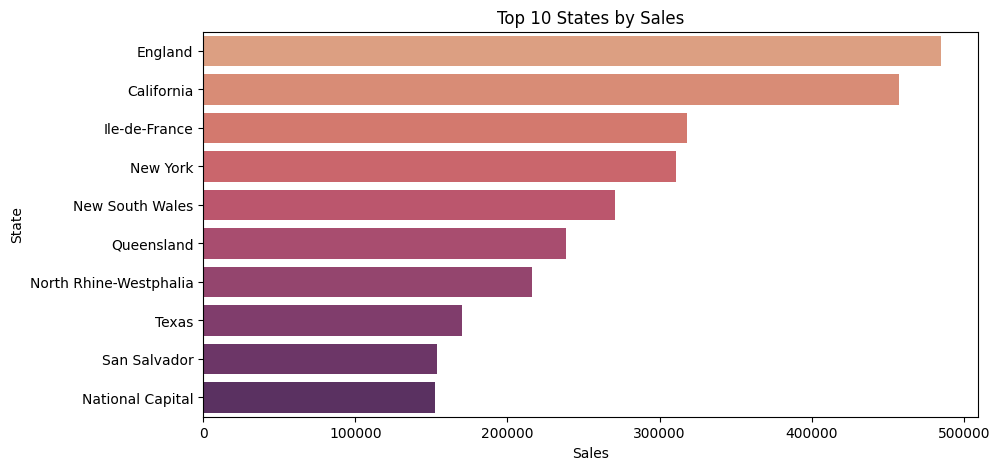

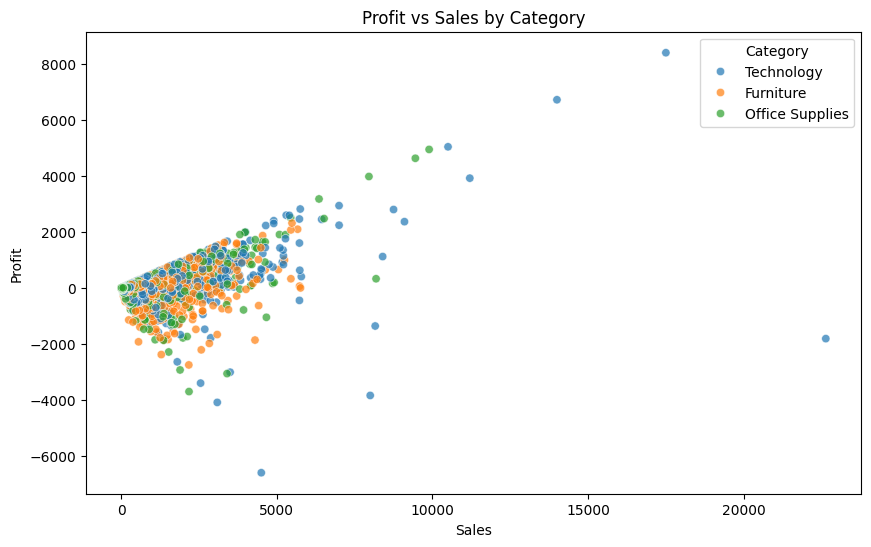

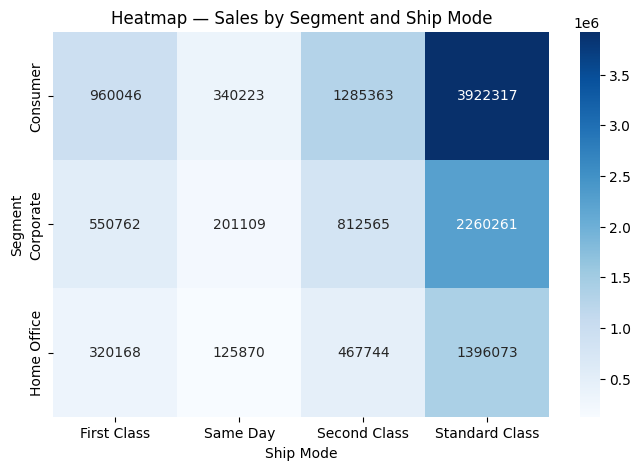

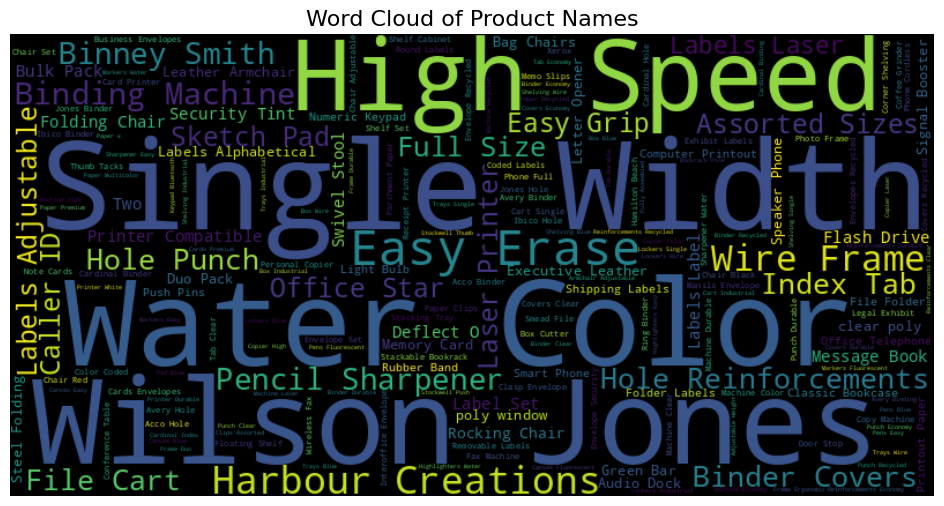

In [ ]:
# Superstore Sales Dashboard

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Dataset Load
df = pd.read_csv('/content/Global_Superstore2.csv', encoding='latin1')

# Clean column names
df.columns = df.columns.str.strip()

# Preview data
print(df.head())
print("Columns:", df.columns.tolist())

# otal Sales and Profit Overview
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
print(f'Total Sales: ${total_sales:,.2f}')
print(f'Total Profit: ${total_profit:,.2f}')

# Top 10 Products by Sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='crest')
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.show()

# Sales by Category and Sub-Category
plt.figure(figsize=(12,6))
sns.barplot(x='Category', y='Sales', hue='Sub-Category', data=df, palette='viridis')
plt.title('Sales by Category and Sub-Category')
plt.ylabel('Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Sales by Region and State
region_sales = df.groupby('Region')['Sales'].sum()
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='magma')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_states.values, y=top_states.index, palette='flare')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales')
plt.show()

# Profit vs Sales Scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df, alpha=0.7)
plt.title('Profit vs Sales by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Heatmap — Sales by Segment and Ship Mode
heatmap_data = pd.pivot_table(df, values='Sales', index='Segment', columns='Ship Mode', aggfunc='sum')

plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='Blues')
plt.title('Heatmap — Sales by Segment and Ship Mode')
plt.show()

# WordCloud of Product Names
text = ' '.join(df['Product Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Names', fontsize=16)
plt.show()